<h1>Probability 概率</h1>

# 0. 常用离散型分布

## 0.0 Binomial & Bernoulli

### 0.0.0 Binomial

投掷硬币$n$次，每次朝上的概率为$\theta$，朝上的总次数$X \in \{0,1,2,...,n\}$服从Binomial分布：

> $X \sim Bin(n,\theta) = \binom{n}{k}\theta^{k} (1 - \theta)^{n-k}$

### 0.0.1 Bernoulli

Binomial分布的特例。投掷硬币1次，朝上的次数$X \in \{0, 1\}$服从Bernoulli分布：

> $X \sim Bern(\theta) = \theta^{\mathbb{I}(X = 1)} (1 - \theta)^{\mathbb{I}(X = 0)}$

## 0.1 Multinomial & Multinoulli

### 0.1.0 Multinomial

投掷具有$K$个面的骰子（常用6个面）$n$次，每个面朝上的概率为$\theta_k$（$\sum_k^{K}\theta_k=1$），
$X =(x_1,x_2,...,x_K)$为每个面朝上的总次数（$\sum_k^{K}x_k=n$）。$X$服从Mulimonial分布：

> $X \sim Mu(\boldsymbol{x}|n,\boldsymbol{\theta})
= \binom{n}{x_1,x_2,...,x_K} \prod_k^{K} \theta_k^{x_k} $

### 0.1.1 Multinoulli

Multinomial分布的特例。投掷骰子1次。$X = (x_1,x_2,...,x_K) $为每个面朝上的次数，$x_k \in \{0, 1\}$，
$X$服从Multinoulli分布，也叫Categorical分布：

> $X \sim Mu(\boldsymbol{x}|1, \boldsymbol{\theta})
  = Cat(\boldsymbol{x}|\boldsymbol{\theta}) 
  = \prod_k^{K} \theta_k^{\mathbb{I}(x_k=1)} $


# 1. 常用连续型分布
## 1.0 Gaussian分布

一元高斯分布，
> $X \sim \mathcal{N}(\mu, \sigma^2) 
 = \frac{1}{\sqrt{2\pi\sigma^2}} exp\{ - \frac{(x-\mu)^2}{2\sigma^2} \} $

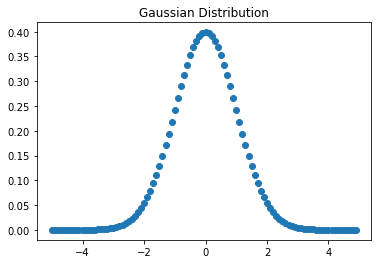

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

def gaussian(x, mu, sigma):
    return 1. / math.sqrt(2 * math.pi * pow(sigma, 2)) * math.exp(- pow(x - mu, 2) / (2 * pow(sigma, 2)))
    
mu = 0.0
sigma = 1.0
x = np.arange(-5., 5., 0.1)
y = list(map(lambda z:gaussian(z, mu, sigma), x))

plt.plot(x, y, 'o')
plt.title('Gaussian Distribution')
plt.show()

## 1.1 Laplace分布

> $X \sim Lap(x|\mu, b) = \frac{1}{2b} exp\{ - \frac{|x-\mu|}{b} \}$


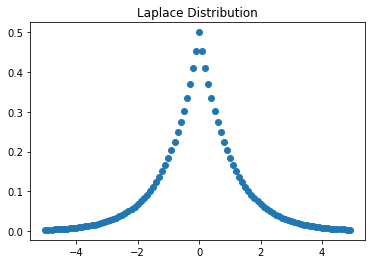

In [5]:
def laplace(x, mu, b):
    return 1. / (2*b) * math.exp(- abs(x - mu) / b)

mu = 0.0
b = 1.0
x = np.arange(-5., 5., 0.1)
y = list(map(lambda z:laplace(z, mu, b), x))

plt.plot(x, y, 'o')
plt.title('Laplace Distribution')
plt.show()

## 1.2 Gamma分布

### 1.2.0 Gamma函数

> $\Gamma(x) = \int_0^{-\infty} u^{x-1}e^{-u}du$




+ x = 0，
> $\Gamma(1) = \int_0^{-\infty} e^{-u}du = -e^{-u}|_{0}^{\infty} = 1$

+ x > 0， 根据分步积分 $\int udv = uv - \int vdu$，

> $\Gamma(x+1) = \int_0^{\infty}u^x e^{-u}du$

> $ = \int_0^{\infty} -u^x d e^{-u} $

> $ =  \{-u^x e^{-u}\}|_0^{\infty} - \int_0^{\infty} e^{-u} d (-u^x)$

> $ = 
\underbrace{
\lim_{u \to \infty}(-u^x e^{-u})}_{-\infty^{x}e^{-\infty} \to 0}
- \underbrace{
\lim_{u \to 0}(-u^x e^{-u})}_{-0e^{-0} \to 0}
+ \underbrace{\int_0^{\infty} e^{-u}x u^{x-1} du}_{x\int_0^{\infty} e^{-u} u^{x-1} du}
$

> $ = x\Gamma(x)$

所以，如果$x$是整数，$\Gamma(x+1) = x!$。

Gamma函数的历史...

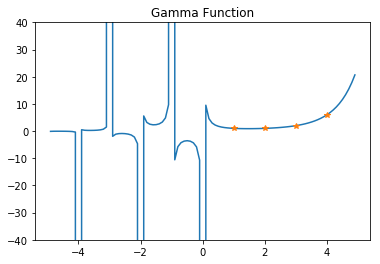

In [29]:
from scipy.special import gamma

x = np.arange(-5., 5., 0.1)
y = list(map(lambda z:gamma(z), x))

plt.ylim(-40, 40)
plt.plot(x, y, '-')
plt.title('Gamma Function')

x = [1, 2, 3, 4]
y = list(map(lambda z:gamma(z), x))
plt.plot(x, y, '*')
plt.show()

### 1.2.1 Gamma分布

> $Ga(T|shape=a, rate=b) = \frac{b^a}{\Gamma(a)}T^{a-1}e^{-Tb}$

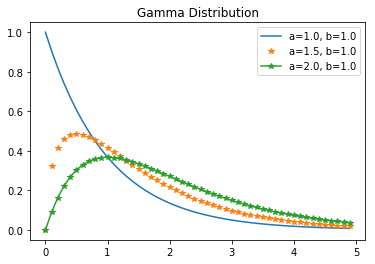

In [49]:
from scipy.special import gamma
from math import exp as exp

def Gamma(t, a, b):
    # a:shape, b:rate
    return pow(b, a) / gamma(a) * pow(t, a-1) * exp(-t*b)

ax = plt.subplot(111)

x = np.arange(0., 5., 0.1)

y = list(map(lambda z:Gamma(z, 1.0, 1.0), x))
ax.plot(x, y, '-', label = 'a=1.0, b=1.0')

y = list(map(lambda z:Gamma(z, 1.5, 1.0), x))
ax.plot(x, y, '*', label = 'a=1.5, b=1.0')

y = list(map(lambda z:Gamma(z, 2.0, 1.0), x))
ax.plot(x, y, '-*', label = 'a=2.0, b=1.0')

plt.title('Gamma Distribution')
ax.legend()

plt.show()

## 1.3 Beta分布

### 1.3.0 Beta函数

> $B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)} = \int_0^1 x^{a-1} (1-x)^{b-1}dx = B(b, a)$

### 1.3.1 Beta分布

> $Beta(x|a, b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$

/Users/flyingman/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


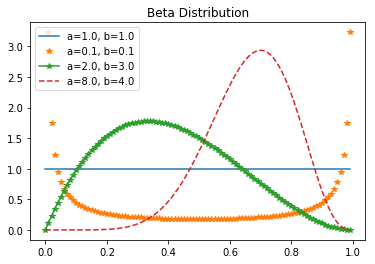

In [56]:
from scipy.special import beta
import matplotlib.pyplot as plt

def Beta(x, a, b):
    return 1. / beta(a, b) * pow(x, a - 1) * pow(1 - x, b - 1)

ax = plt.subplot(111)

a = 1.0
b = 2.0
x = np.arange(0, 1., 0.01)
y = list(map(lambda z:Beta(z, 1.0, 1.0), x))
ax.plot(x, y, '-', label = 'a=1.0, b=1.0')

y = list(map(lambda z:Beta(z, 0.1, 0.1), x))
ax.plot(x, y, '*', label = 'a=0.1, b=0.1')

y = list(map(lambda z:Beta(z, 2.0, 3.0), x))
ax.plot(x, y, '-*', label = 'a=2.0, b=3.0')

y = list(map(lambda z:Beta(z, 8.0, 4.0), x))
ax.plot(x, y, '--', label = 'a=8.0, b=4.0')

ax.legend()
plt.title('Beta Distribution')
plt.show()

## 1.4 多元Gaussian分布

> $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = 
\frac{1}
{(2\pi)^{D/2}|\boldsymbol{\Sigma}|^{1/2} }
exp\left[ - \frac{1}{2} 
(\boldsymbol{x} - \boldsymbol{\mu})^T
\boldsymbol{\Sigma}^{-1}
(\boldsymbol{x} - \boldsymbol{\mu})
\right] 
$

## 1.5 Dirichlet分布

+ Beta函数：
> $B(a, b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$

+ Beta分布：

> $Beta(x|a, b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$

Dirchlet分布是Beta分布的多元版本，对于$S_K = \{ \boldsymbol{x}:0 \le x_k \le 1, \sum_{k=1}^K x_k = 1\}$，有

> $Dir(\boldsymbol{x}|\boldsymbol{\alpha}) = 
\frac{1}{
B(\boldsymbol{\alpha)}} 
\prod_{k=1}^K x_k^{\alpha_k-1}
\mathbb{I}(\boldsymbol{x} \in S_k)
$

> $B(\boldsymbol{\alpha}) = \frac{\prod_{k=1}^{K}\Gamma(\alpha_k)}{\Gamma(\alpha_0)}, 
\alpha_0 = \sum_{k=1}^{K}\alpha_k
$

## 1.6 Gibbs Distribution

无向图模型（马尔科夫随机场），又叫Gibbst Distribution。

> $p(x_1,x_2,...,x_m) = \frac{1}{Z} \prod_{C \in \mathcal{C}} \psi_C(x_C) $

$\mathcal{C}$常常是图的最大子团集合（但最大不是必要的），也可以是所有子团的集合。


## 1.7 指数分布族 Exponential Family

# 2. 贝叶斯规则 & 共轭先验

## 2.0 贝叶斯规则
> $p(\theta|D) = \frac{p(\theta, D)}{p(D)}
= \frac{p(D|\theta)p(\theta)}{p(D)}$

> $\propto p(D|\theta)p(\theta)$

## 2.1 共轭先验

如果参数$\theta$的后验分布与先验分布$p(\theta)$有相同的形式，则称先验$p(\theta)$是似然函数$p(D|\theta)$的共轭先验。

### 2.1.0 Beta-binomial Model


+ 似然，Binomial分布：

> $p(D|\theta) \sim Bin(n,\theta) = \binom{n}{k}\theta^{k} (1 - \theta)^{n-k}$

+ 先验，Beta分布：

> $ p(\theta) = Beta(\theta|a, b) = \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}$

+ 后验，Binomial分布：

> $p(\theta|D) \propto p(D|\theta) p(\theta) = 
\binom{n}{k}\theta^{k} (1 - \theta)^{n-k} 
\frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}$

> $\propto \theta^{k+a-1}(1-\theta)^{n+b-k-1}$

可以看出，Beta分布是Binomial分布的共轭先验。


### 2.1.1 Dirichlet -multinomial Model

### 2.1.2 Gaussian & Gaussian Distribution


# 3. 贝叶斯学派统计

# 4. 频率学派统计

# 5. 广义线性模型